# Implementation of the NCF Model

Recommender System are simply systems that are designed to recommend stuff to users (Movies, Books, etc) in such a way that the sales, views, etc of that particular item is maximized.

All the Digital Companies today use these recommender system to  recommend stuff to us so as to optimize our buying experience and also to maximize their profit

Eg: Netflix reccomends movies , Amazon Recommends Products, Facebook Shows Ads on the feed based on the user's interests

<img src="https://i0.wp.com/thedatascientist.com/wp-content/uploads/2018/05/recommender_systems.png?fit=1600%2C616&ssl=1" />

## Data Pre-Processing

In [1]:
#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#importing the dataset
df = pd.read_csv('recommenderDataset.csv')
df.head()

,Unnamed: 0,user_id,anime_id,rating_x,name
0,1,3,20,1.0,Naruto
1,2,5,20,1.0,Naruto
2,5,21,20,1.0,Naruto
3,6,28,20,1.0,Naruto
4,7,34,20,1.0,Naruto


In [3]:
#model parameters
user_vocabulary = df['user_id'].max()
anime_vocabulary = df['anime_id'].max()
print(user_vocabulary)
print(anime_vocabulary)

73516
34475


In [4]:
#dataset to train
x1 = np.array(df['user_id']).reshape(-1)
x2 = np.array(df['anime_id']).reshape(-1)
y_train = df['rating_x']

## Building and Training The Network

In [5]:
#creating the model
user = tf.keras.layers.Input(1,)
anime = tf.keras.layers.Input(1,)

#Embedding Layers for user
embedd_x = tf.keras.layers.Embedding(user_vocabulary+1,10)(user)
embedd_y = tf.keras.layers.Embedding(anime_vocabulary+1,10)(anime)

#concatenate the outputs
x = tf.keras.layers.Concatenate()([embedd_x,embedd_y])
x = tf.keras.layers.Dense(24,activation=tf.keras.activations.relu)(x)
x = tf.keras.layers.Dense(1,activation=tf.keras.activations.sigmoid)(x)

model = tf.keras.models.Model(inputs=[user,anime],outputs=x)

In [6]:
#compile and train
model.compile(loss=tf.keras.losses.binary_crossentropy,optimizer=tf.keras.optimizers.Adam(learning_rate=0.05),metrics=['accuracy'])
train = model.fit([x1,x2],y_train,epochs=10,batch_size=1024)

Epoch 1/10
6189/6189 [==============================] - 87s 14ms/step - loss: 0.1956 - accuracy: 0.9314
Epoch 2/10
6189/6189 [==============================] - 87s 14ms/step - loss: 0.1825 - accuracy: 0.9338
Epoch 3/10
6189/6189 [==============================] - 89s 14ms/step - loss: 0.1798 - accuracy: 0.9346
Epoch 4/10
6189/6189 [==============================] - 89s 14ms/step - loss: 0.1782 - accuracy: 0.9351
Epoch 5/10
6189/6189 [==============================] - 85s 14ms/step - loss: 0.1772 - accuracy: 0.9353
Epoch 6/10
6189/6189 [==============================] - 84s 14ms/step - loss: 0.1766 - accuracy: 0.9355
Epoch 7/10
6189/6189 [==============================] - 85s 14ms/step - loss: 0.1761 - accuracy: 0.9356
Epoch 8/10
6189/6189 [==============================] - 86s 14ms/step - loss: 0.1759 - accuracy: 0.9357
Epoch 9/10
6189/6189 [==============================] - 83s 13ms/step - loss: 0.1756 - accuracy: 0.9359
Epoch 10/10
6189/6189 [==============================] - 83s 13m

In [7]:
#save and load
model.save("recommenderSystem.h5")
model = tf.keras.models.load_model('recommenderSystem.h5')

## Network's Performance Analysis

In [8]:
#get the accuracy
y_pred = model.predict([x1,x2])
y_pred = y_pred.reshape(-1)
(y_pred.round() == y_train).mean()

0.9374093355166185

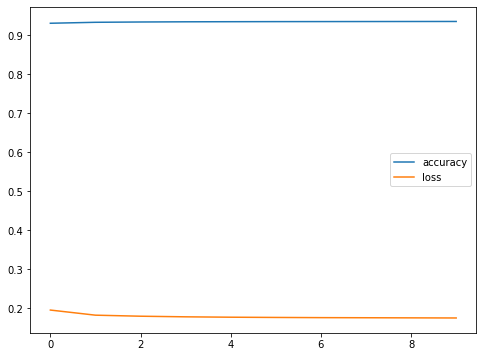

In [9]:
#visualizing the accuracy and the loss
plt.figure(figsize=(8,6))
plt.plot(train.history['accuracy'],label="accuracy")
plt.plot(train.history['loss'],label="loss")
plt.legend()

## Working of the Recommender System

In [10]:
#example anime
df[ df['rating_x'] == 0.0 ]

,Unnamed: 0,user_id,anime_id,rating_x,name
22,27,99,20,0.0,Naruto
30,35,125,20,0.0,Naruto
61,73,234,20,0.0,Naruto
77,90,271,20,0.0,Naruto
79,92,273,20,0.0,Naruto
...,...,...,...,...,...
6337230,7813716,64178,30666,0.0,Memories: Younenki no Joukei
6337231,7813717,64178,30667,0.0,Mou Hitotsu no Nijiiro Toshi
6337232,7813718,64178,30669,0.0,Why Re-Mix 2002
6337233,7813719,64178,30814,0.0,Landscape


In [11]:
#Recommender System Working
user_id = int(input("Enter the User Id: "))
anime_id = int(input("Enter the Anime Id: "))
y_pred = model.predict([np.array([user_id]),np.array([anime_id])])
if y_pred.round():
    print(f"The User Will probably Like {df[df['anime_id'] == anime_id]['name'].iloc[0]}")
else:
    print(f"The user Will probably Not Like {df[df['anime_id'] == anime_id]['name'].iloc[0]}")

Enter the User Id: 64178
Enter the Anime Id: 30814
The user Will probably Not Like Landscape


In [12]:
# New Predictions
user_id = int(input("Enter the User Id: "))
anime_id = int(input("Enter the Anime Id: "))
y_pred = model.predict([np.array([user_id]),np.array([anime_id])])
if y_pred.round():
    print(f"The User Will probably Like {df[df['anime_id'] == anime_id]['name'].iloc[0]}")
else:
    print(f"The user Will probably Not Like {df[df['anime_id'] == anime_id]['name'].iloc[0]}")

Enter the User Id: 64178
Enter the Anime Id: 20
The User Will probably Like Naruto


## Conclusion

Similarly, A particular User's Id can be matched with a new Anime's Id that the user haven't watched and the model could predict if the user would like the model or not